# Agglomerative Clustering

### Load Libraries

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.patches as mpatches
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

### Load Dataset

In [2]:
# save data under variable name Iris_data
Iris_data = pd.read_csv("IrisData.csv")

# display first few rows of data
Iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# See species of plants
Iris_data.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [4]:
X = Iris_data[["SepalLengthCm","PetalLengthCm","PetalWidthCm"]]

# Display shape of data (no. rows, no.columns)
X.shape

(150, 3)

### Visualize the dataset

C:\Users\use\AppData\Local\Temp\ipykernel_2276\3567598174.py:16: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(x, y, z, s=40, c= Iris_data["Species"].map(colors) ,cmap = colors, marker='o', alpha=0.5)


Text(0.5, 0, 'PetalWidthCm')

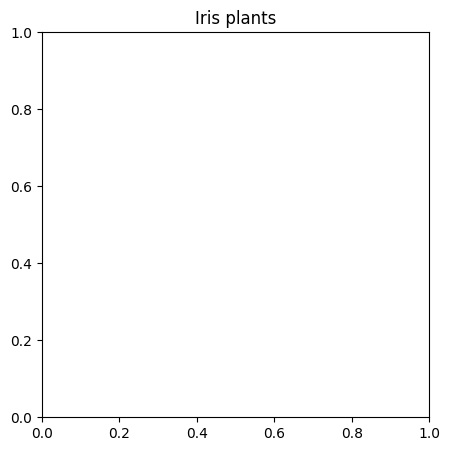

In [5]:
# variables
x = X.iloc[:,0]
y = X.iloc[:,1]
z = X.iloc[:,2]

# axes instance
fig = plt.figure(figsize=(5,5))
ax = Axes3D(fig)

    
# color-code species
colors = {'Iris-setosa':'orange', 'Iris-versicolor':'grey', 'Iris-virginica':'lightblue'}    


# plot
ax.scatter(x, y, z, s=40, c= Iris_data["Species"].map(colors) ,cmap = colors, marker='o', alpha=0.5)

#legend
orange_patch = mpatches.Patch(color='orange', label='Iris-setosa')
grey_patch = mpatches.Patch(color='grey', label='Iris-versicolor')
lightblue_patch = mpatches.Patch(color='lightblue', label='Iris-virginica')
ax.legend(handles=[orange_patch, grey_patch, lightblue_patch ])

#title
plt.title("Iris plants")

# axes labels
ax.set_xlabel('SepalLengthCm')
ax.set_ylabel('PetalLengthCm')
ax.set_zlabel('PetalWidthCm')

In [6]:
hc = AgglomerativeClustering(n_clusters=3, linkage="ward")
hc = hc.fit(X)
hc.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int64)

Text(0.5, 0, 'PetalWidthCm')

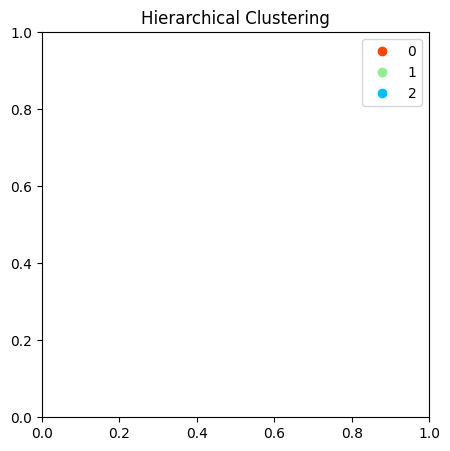

In [7]:
# create a color map for each cluster
cmap = ListedColormap(["orangered", "lightgreen", "deepskyblue"])

# variables
x = X.iloc[:,0] # SepalLengthCm
y = X.iloc[:,1] # PetalLengthCm
z = X.iloc[:,2] # PetalWidthCm

# axes instance
fig = plt.figure(figsize=(5,5))
ax = Axes3D(fig)

# plot
sc = ax.scatter(x, y, z, s=40, c = hc.labels_, cmap = cmap, marker='o', alpha=1)

# legend
plt.legend(*sc.legend_elements())

#title
plt.title("Hierarchical Clustering")

# axes labels
ax.set_xlabel('SepalLengthCm')
ax.set_ylabel('PetalLengthCm')
ax.set_zlabel('PetalWidthCm')

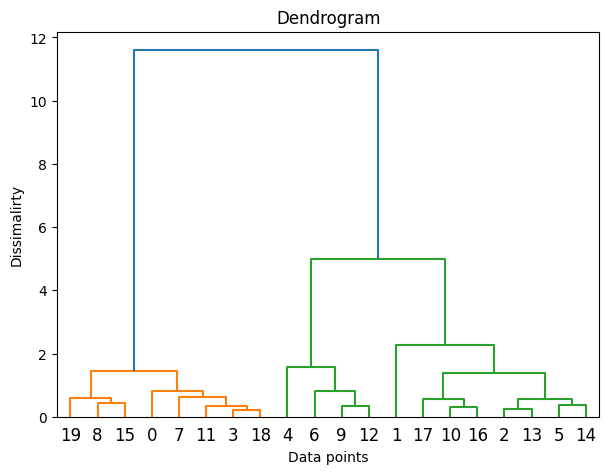

In [8]:
# define linkage 
linked = linkage(X.sample(n=20, random_state=1), 'ward')

# set figure size
plt.figure(figsize=(7, 5))

# dendrogram function 
dendrogram(linked,
            orientation='top')

# axis labels
plt.title("Dendrogram")
plt.ylabel("Dissimalirty")
plt.xlabel("Data points")

plt.show()